# Import Packages

In [1]:
import test_helper as th
import numpy as np
import pandas as pd 
import Statistics
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

# Load Data

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
df = pd.read_csv("./Data/Fast.csv")

The Universe is S&P500

BackTest Period: 2019-03-01 -> 2020-02-28; Use Data Period: 2018-03-01 -> 2019-02-28  
Trading Period: 2020-03-02 -> 2020-03-31; Use Data Period: 2019-03-01 -> 2020-02-28 

In [4]:
df.head(3)

,Date,Ticker,Close,Return,1W,1M,3M,6M,SPY Close,SPY Return,Rf,Beta,Alpha,1W + 1M,1W + 3M,1W + 6M,1M + 3M,1M + 6M,3M + 6M,1W + 1M + 3M,1W + 1M + 6M,1W + 3M + 6M,1M + 3M + 6M,Total Rank
0,2018-03-01,MMM,231.339996,-0.017706,7.0,8.0,7.0,4.0,267.700012,-0.014541,0.000081,1.074155,-0.524473,7.5,7.0,5.5,7.5,6.0,5.5,7.333333,6.333333,6.000000,6.333333,6.50
1,2018-03-01,AOS,62.060001,-0.033183,10.0,6.0,6.0,4.0,267.700012,-0.014541,0.000081,1.153893,-4.130742,8.0,8.0,7.0,6.0,5.0,5.0,7.333333,6.666667,6.666667,5.333333,6.50
2,2018-03-01,ABT,58.790001,-0.025526,4.0,6.0,4.0,3.0,267.700012,-0.014541,0.000081,0.911332,-3.095087,5.0,4.0,3.5,5.0,4.5,3.5,4.666667,4.333333,3.666667,4.333333,4.25


Factors are Momentum: 1-Week, 1-Month, 3-Month, 6-Month  
Combine Factors: 1 Week + 1 Month (average), etc.     

In [5]:
Factors = ['1W', '1M', '3M', '6M', 
           '1W + 1M', '1W + 3M', '1W + 6M', '1M + 3M', '1M + 6M', '3M + 6M',
           '1W + 1M + 3M', '1W + 1M + 6M', '1W + 3M + 6M', '1M + 3M + 6M',
           'Total Rank']

In [6]:
Tickers = list(set(df['Ticker'].values))
Date1 = '2019-02-28'
Date2 = '2020-02-28'  # '2020-02-29' is not trading day
Date3 = '2020-03-31'

# BackTesting

In [7]:
Option1 = 'BackTest'
BT = th.BackTest(df, Factors)

In [8]:
BT.Construct_DF(Tickers, Date1, Date2)

In [9]:
N = 7

## Show BackTesting Pairs

**<font color = red size = 3>Selection Criteria</font>**

Every Stock has a series of daily ranks on each Factor;  
Take the average of these ranks  
e.g. AAPL 1-Week Momentum Average Rank is 7.33; 

For each factor, select the highest 7 stocks and put into Top List and put lowest 7 stocks into Bottom List;  
Then I gather all the stocks and collect their **<font color = red size = 3>Frequency</font>**

Select 2 stocks which appear most in Top List -> Long stock1 and stock2;  
Select 2 stocks which appear most in Bottom List -> Short stock1 and stock2

In [10]:
BT.Select_Stock_List(N, Option1)
#BT.Select_Stock_List(Option1)
BT.Determine_Stock(Option1)

**<font color = red size = 3>Optimize</font>**

Each Side on Long and Short has $25e6  
Optimize 2 stocks on Long side and 2 stocks on Short side  
Minimize each side variance

In [11]:
BT.Show_Pairs(Option1)
BT.Pair_Information

,Pair,Long,Long_Weight,Short,Short_Weight
0,Pair1,VRSN,0.351041,AMG,0.574647
1,Pair2,AES,0.648920,IVZ,0.425236


In [12]:
BT.Cal_PnL(Option1)

## Show PnL & Return DataFrame

In [13]:
BT.PnL.head(3)

,PnL1,PnL2,Daily Return1,Cum Return1,Daily Return2,Cum Return2,Total Daily PnL,Total Daily Return,Total Cum Return,Daily SPY,Cum SPY
Date,,,,,,,,,,,
2019-03-01,0.00000,0.000000,0.000000,1.000000,0.00000,1.00000,0.000000,0.000000,1.000000,0.000000,1.000000
2019-03-04,-147671.91801,-319571.510064,-0.006381,0.993619,-0.01190,0.98810,-467243.428074,-0.009345,0.990655,-0.003637,0.996363
2019-03-05,254981.12475,267204.085440,0.011018,1.004637,0.00995,0.99805,522185.210190,0.010444,1.001099,-0.001360,0.995002


In [14]:
BT.PnL.tail(3)

,PnL1,PnL2,Daily Return1,Cum Return1,Daily Return2,Cum Return2,Total Daily PnL,Total Daily Return,Total Cum Return,Daily SPY,Cum SPY
Date,,,,,,,,,,,
2020-02-26,191355.790368,-4.217089e+05,0.008269,1.194174,-0.015704,1.123244,-230353.146666,-0.004607,1.156064,-0.003678,1.113332
2020-02-27,-76206.423333,9.772818e+04,-0.003293,1.190882,0.003639,1.126883,21521.752965,0.000430,1.156494,-0.044912,1.068421
2020-02-28,618900.008664,-1.337161e+06,0.026743,1.217625,-0.049794,1.077089,-718260.856548,-0.014365,1.142129,-0.004202,1.064219


## Portfolio Risk Characteristics

In [15]:
Statistics.Summarize(BT.PnL, freq='d')

Summary Statistics (Return):
count    250.000000
mean       0.000569
std        0.007968
min       -0.026890
25%       -0.004366
50%        0.001278
75%        0.004963
max        0.034520
Name: Total Daily Return, dtype: float64
--------------------------------------------
Summary Statistics (PnL):
count    2.500000e+02
mean     2.842583e+04
std      3.984165e+05
min     -1.344518e+06
25%     -2.182867e+05
50%      6.387704e+04
75%      2.481495e+05
max      1.726014e+06
Name: Total Daily PnL, dtype: float64
--------------------------------------------
Summary Statistics (Annualized Return):
Mean:  0.143266164885648
t-statistics:  1.1348706587614474 ;  p-value:  0.25752078932524897
--------------------------------------------
Total PnL:  7106456.59155
Final Wealth:  57106456.59155
--------------------------------------------
Information Ratio: 0.39
--------------------------------------------
Maximum DrawDown: 6.99%
--------------------------------------------
VaR at 95% Level: $62691

## Plot Time Series

D:\Anaconda\Setup\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


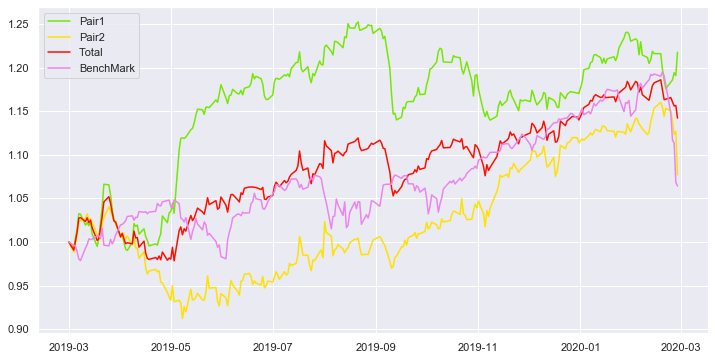

In [16]:
BT.Plot_Return()

# Trading in March 2020

In [17]:
Option2 = 'Trade'
TD = th.Trade(df, Factors)

In [18]:
TD.Construct_DF(Tickers, Date1, Date2, Date3)

In [19]:
TD.Select_Stock_List(N, Option2) # N = 7
#TD.Select_Stock_List(Option2) # N = 7

## Show Trading Pairs

In [20]:
TD.Determine_Stock(Option2)
TD.Show_Pairs(Option2)
TD.Pair_Information

,Pair,Long,Long_Weight,Short,Short_Weight
0,Pair1,GPN,0.524382,MAC,0.895765
1,Pair2,MCO,0.475012,RRC,0.104193


In [21]:
TD.Cal_PnL(Option2)

## Show 1-Month Daily PnL & Return DataFrame

In [22]:
TD.PnL

,PnL1,PnL2,Daily Return1,Cum Return1,Daily Return2,Cum Return2,Total Daily PnL,Total Daily Return,Total Cum Return,Daily SPY,Cum SPY
Date,,,,,,,,,,,
2020-03-02,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000,1.000000,0.000000e+00,0.000000,1.000000,0.000000,1.000000
2020-03-03,-6.135351e+05,-2.741925e+05,-0.017281,0.982719,-0.018936,0.981064,-8.877276e+05,-0.017755,0.982245,-0.028632,0.971368
2020-03-04,-3.381750e+05,6.943184e+05,-0.009525,0.973194,0.047950,1.029014,3.561435e+05,0.007123,0.989368,0.042033,1.013401
2020-03-05,5.311616e+05,-6.368723e+05,0.014961,0.988155,-0.043983,0.985031,-1.057107e+05,-0.002114,0.987254,-0.033242,0.980159
2020-03-06,5.697327e+05,-7.353339e+05,0.016047,1.004202,-0.050782,0.934249,-1.656012e+05,-0.003312,0.983942,-0.016531,0.963628
2020-03-09,2.247144e+06,-9.948258e+05,0.063293,1.067495,-0.068703,0.865546,1.252318e+06,0.025046,1.008988,-0.078094,0.885533
2020-03-10,1.251557e+05,8.546109e+05,0.003525,1.071020,0.059020,0.924566,9.797666e+05,0.019595,1.028584,0.051745,0.937278
2020-03-11,1.588673e+06,-4.298106e+05,0.044747,1.115767,-0.029683,0.894883,1.158863e+06,0.023177,1.051761,-0.048748,0.888530
2020-03-12,8.676048e+05,-9.476958e+05,0.024437,1.140204,-0.065448,0.829435,-8.009104e+04,-0.001602,1.050159,-0.095677,0.792853


## Plot Time Series

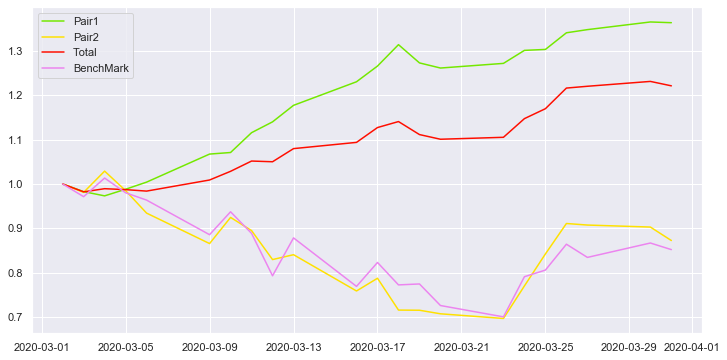

In [23]:
TD.Plot_Return()